# Import libraries and dataset

In [718]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150

In [719]:
df = pd.read_csv("./datasets/titanic_train.csv")

# Initial exploration

In [720]:
# Check details of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that our dataframe has 11 columns with 891 entries, with different data types such as integers, floats, and objects. We can visualize the first 5 entries of our dataset:

In [721]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It seems like our *object* data types are string-like. Now we can begin cleaning our dataset.

In [722]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [723]:
df.skew(numeric_only=True)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

# Visualization

## Fare

In [724]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [725]:
print("Fare Median:", df.Fare.median())
print("Fare Mean", df.Fare.mean())
print("Fare Skew:", df.Fare.skew())
print("Fare Kurtosis:", df.Fare.kurtosis())

Fare Median: 14.4542
Fare Mean 32.204207968574636
Fare Skew: 4.787316519674893
Fare Kurtosis: 33.39814088089868


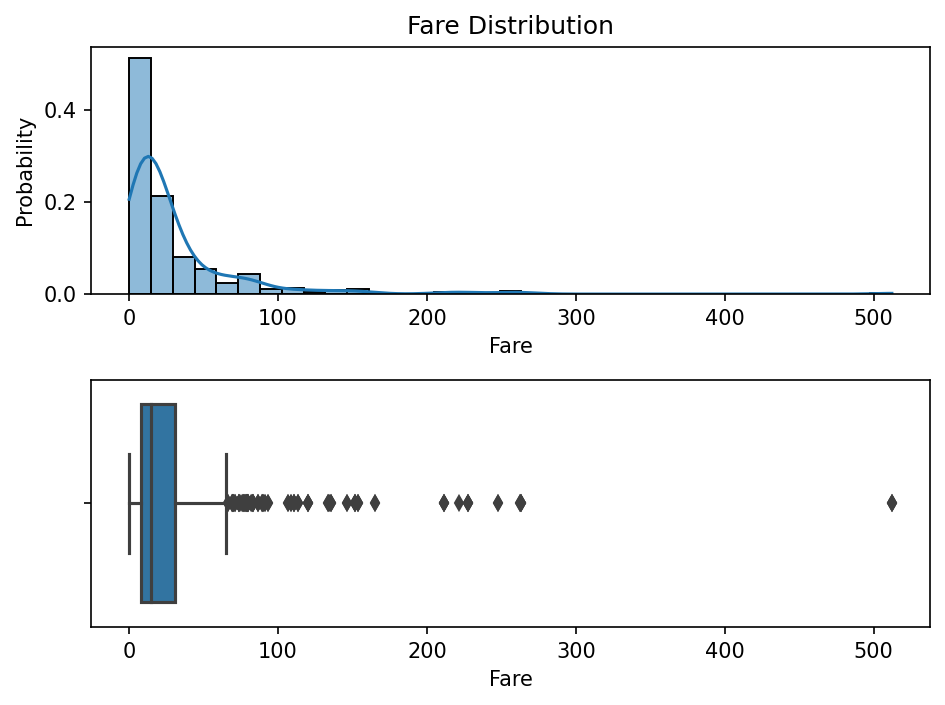

In [726]:
fig, axes = plt.subplots(2,1)

sns.histplot(data=df, x="Fare", kde=True, stat="probability", bins=35, ax = axes[0])
axes[0].set_title("Fare Distribution")

sns.boxplot(data=df, x="Fare", ax=axes[1])

plt.tight_layout()
plt.show()

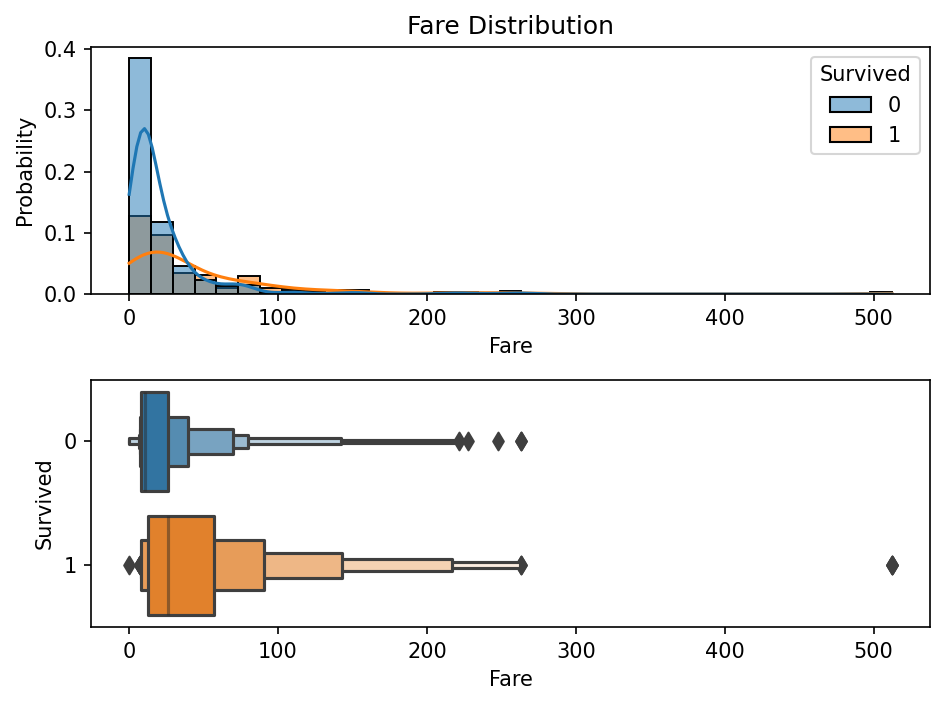

In [727]:
fig, axes = plt.subplots(2,1)

sns.histplot(data=df, x="Fare", hue="Survived", kde=True, stat="probability", bins=35, ax = axes[0])
axes[0].set_title("Fare Distribution")

sns.boxenplot(data=df, x="Fare", y="Survived", orient="h", ax=axes[1])

plt.tight_layout()
plt.show()

In [728]:
# Relationships between fare, ticket, deck and class?
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

### Free Fares ???
Before transformation

In [729]:
free_fare = df[df.Fare < 1]
print(len(free_fare))
free_fare.head()

15


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S


In [730]:
free_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 179 to 822
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  15 non-null     int64  
 1   Survived     15 non-null     int64  
 2   Pclass       15 non-null     int64  
 3   Name         15 non-null     object 
 4   Sex          15 non-null     object 
 5   Age          7 non-null      float64
 6   SibSp        15 non-null     int64  
 7   Parch        15 non-null     int64  
 8   Ticket       15 non-null     object 
 9   Fare         15 non-null     float64
 10  Cabin        3 non-null      object 
 11  Embarked     15 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ KB


In [731]:
free_fare.Pclass.value_counts()

2    6
1    5
3    4
Name: Pclass, dtype: int64

Pretty even split between first, second and third class tickets. We should obtain median/mean ticket price for each class and fill these rows in with it.

In [732]:
print("Sex frequency:\n", free_fare.Sex.value_counts().to_string())
print("Embarking ports:\n", free_fare.Embarked.value_counts().to_string())

Sex frequency:
 male    15
Embarking ports:
 S    15


In [733]:
print(f"Survived frequency:\n{free_fare.Survived.value_counts().to_string()}")

Survived frequency:
0    14
1     1


In [734]:
free_fare.Cabin.value_counts()

B94     1
A36     1
B102    1
Name: Cabin, dtype: int64

In [735]:
print("Parents or children:", free_fare.Parch.sum())
print("Siblings or spouses:", free_fare.SibSp.sum())
print("No parents, children, siblings or spouses :/")

Parents or children: 0
Siblings or spouses: 0
No parents, children, siblings or spouses :/


In [736]:
free_fare.Ticket.value_counts()

LINE      4
239853    3
112059    1
239854    1
112052    1
239856    1
239855    1
112050    1
112058    1
19972     1
Name: Ticket, dtype: int64

Four LINE tickets? What does this mean? Three 239853 tickets, are they related?

In [737]:
ticket239853 = free_fare.Ticket.value_counts().index[1]
free_fare[free_fare.Ticket == "239853"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S


It looks that they are not relatives, maybe friends? Must one assume this? 

In [738]:
# 3rd class rooms were communal
# 2nd class private rooms, shared bathrooms
# 

### Log-normal transform

Fare Median: 2.737880811060884
Fare Mean 2.9622457416890815
Fare Skew: 0.3949280095189306
Fare Skew: 0.976142106683104


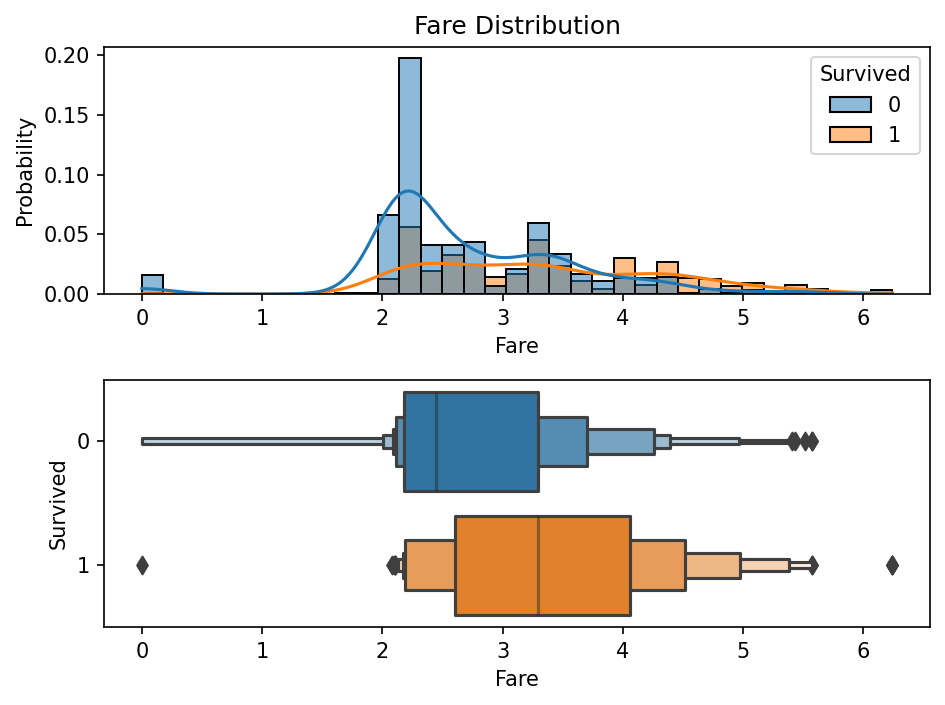

In [739]:
import numpy as np

df["Fare"] = np.log(df.Fare + 1)

print("Fare Median:", df.Fare.median())
print("Fare Mean", df.Fare.mean())
print("Fare Skew:", df.Fare.skew())
print("Fare Skew:", df.Fare.kurtosis())

fig, axes = plt.subplots(2,1)

sns.histplot(data=df, x="Fare", hue="Survived", kde=True, stat="probability", bins=35, ax = axes[0])
axes[0].set_title("Fare Distribution")

sns.boxenplot(data=df, x="Fare", y="Survived", orient="h", ax=axes[1])

plt.tight_layout()
plt.show()

## Age

In [740]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [741]:
print("Age Median:", df.Age.median())
print("Age Mean", df.Age.mean())
print("Age Skew:", df.Age.skew())
print("Age Kurtosis:", df.Age.kurtosis())

Age Median: 28.0
Age Mean 29.69911764705882
Age Skew: 0.38910778230082704
Age Kurtosis: 0.17827415364210353


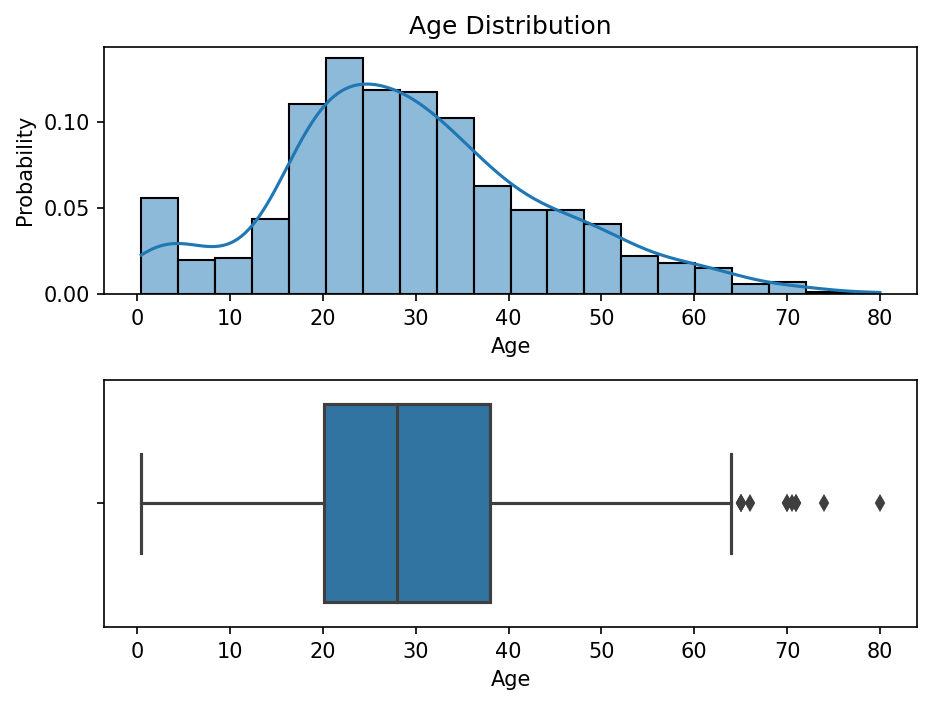

In [742]:
fig, axes = plt.subplots(2,1)

sns.histplot(data=df, x="Age", kde=True, stat="probability", ax = axes[0])
axes[0].set_title("Age Distribution")

sns.boxplot(data=df, x="Age", ax=axes[1])

plt.tight_layout()
plt.show()

In [756]:
df[(df.Age < 8)].mean()

C:\Users\Cris\AppData\Local\Temp\ipykernel_3424\2042097501.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[(df.Age < 8)].mean()


PassengerId    424.700000
Survived         0.680000
Pclass           2.580000
Age              2.983400
SibSp            1.740000
Parch            1.360000
Fare             3.279887
dtype: float64

## ParCh

In [744]:
df.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [745]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Seems like most passangers don't have either parents or children, but this doesn't mean that they're traveling alone, they still might have siblings or spouses. Let's explore these potential familial relationships

In [746]:
lol = df[(df.Parch > 0) & (df.SibSp > 0)]
lol["Famrel"] = lol.Parch - lol.SibSp
lol.Famrel.value_counts()

C:\Users\Cris\AppData\Local\Temp\ipykernel_3424\1711320123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lol["Famrel"] = lol.Parch - lol.SibSp


 0    61
 1    20
-2    16
-3    14
-1    14
-6     7
 4     3
 2     3
 3     3
 5     1
Name: Famrel, dtype: int64

In [747]:
lol.groupby("Famrel").get_group(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Famrel
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,2.873565,G6,S,0
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,2.787834,NaN,C,0
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,3.150952,F E69,C,0
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,3.630985,NaN,S,0
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,3.566005,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,4.432700,E49,C,0
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,2.787834,NaN,C,0
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,5.111184,NaN,S,0
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,2.495954,NaN,S,0


Subtracting Parch from SibSp
- lol

In [748]:
two_siblings = df[(df.SibSp >= 2) & (df.Parch == 0)]
two_siblings.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,2.944439,NaN,S
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,3.121448,NaN,C
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,2.268252,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,2.824351,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,2.188856,NaN,S


In [749]:
two_siblings_tickets = two_siblings.Ticket.value_counts()
for ticket in two_siblings_tickets.index.to_list():
    sub = two_siblings.groupby("Ticket").get_group(ticket)
    print(sub.Name.to_list())

['Hickman, Mr. Stanley George', 'Hickman, Mr. Leonard Mark', 'Hickman, Mr. Lewis']
['Vander Planke, Miss. Augusta Maria', 'Vander Planke, Mr. Leo Edmondus']
['McCoy, Mr. Bernard', 'McCoy, Miss. Agnes']
['Samaan, Mr. Youssef']
['Kink, Mr. Vincenz']
['Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)']
['Gustafsson, Mr. Anders Vilhelm']
['Minahan, Dr. William Edward']
['Gustafsson, Mr. Johan Birger']
['Davies, Mr. Alfred J']
['Appleton, Mrs. Edward Dale (Charlotte Lamson)']
['Frauenthal, Dr. Henry William']
['Renouf, Mrs. Peter Henry (Lillian Jefferys)']
['Hansen, Mr. Claus Peter']


Only one of these results corresponds to three siblings traveling alone. The rest might be in the test dataset, or the information was lost (which is more likely). Keeping these in would probably affect the efficacy of using both the ParCh and SibSp features in our models.

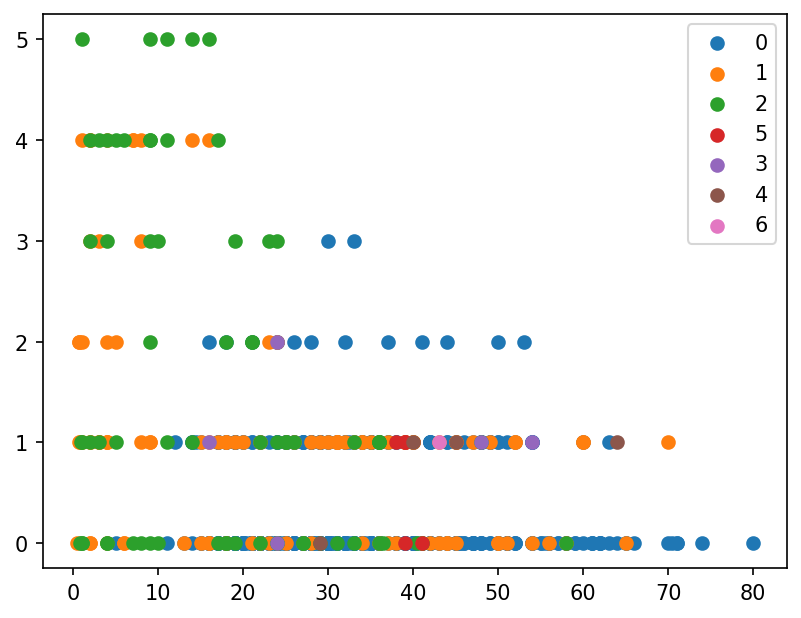

In [750]:
for n_parch in df.Parch.value_counts().index.to_list():
    mini_df = df.groupby("Parch").get_group(n_parch)
    sibsp = mini_df.SibSp
    age = mini_df.Age
    plt.scatter(age, sibsp, label=str(n_parch))
plt.legend()
plt.show()

In [751]:
fam_tensor = []

Parch and SibSp table rationale

|           | 0 (Parch) | 1 (Parch) | 2 (Parch) | 3 (Parch) |
| :-------: |:--------: | :-------: | :-------: | :-------: |
| 0 (SibSp) | Alone/with friends | 1 Par with 1 Ch | 2 Par with 1 Ch / 1 Par with 2 Ch / 1 GPar, 1 Par, 1 Ch | Person with 2 Par and 1 Ch / Person with 1 Par and 2 Ch |
|    1      | Couple / 2 Sib alone | 2 Par with 1 Ch / 1 Par with 2 Ch / 2 Sib, 1 Ch | 0 | 0 |
|    2      | 3 Sib alone | 0 | 0 | 0 |
|    3      | 0 | 0 | 0 | 0 |

Features
- Alone
- Family size
- Traveling with friends
- Single mothers?

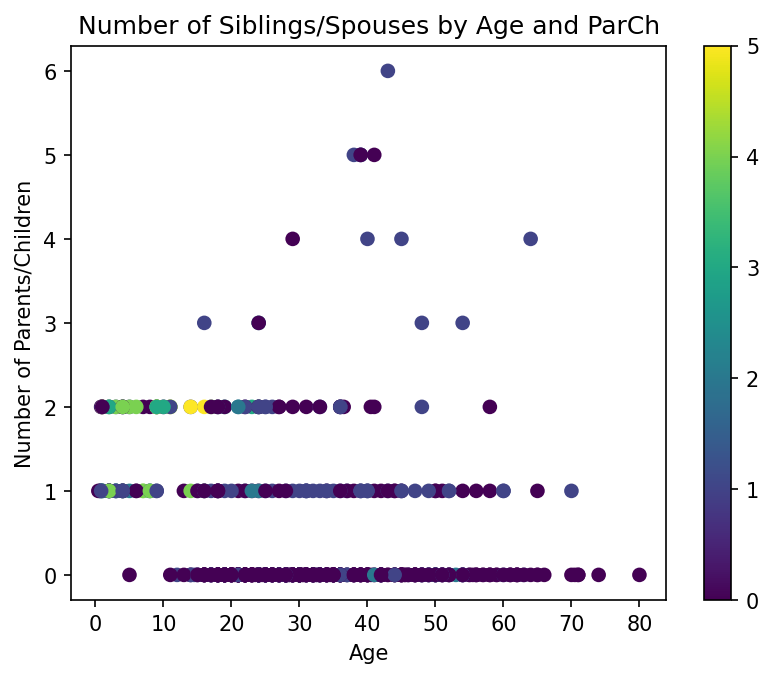

In [752]:
plt.scatter(df.Age, df.Parch, c=df.SibSp)
plt.title("Number of Siblings/Spouses by Age and ParCh")
plt.xlabel("Age")
plt.ylabel("Number of Parents/Children")
plt.colorbar()
plt.show()

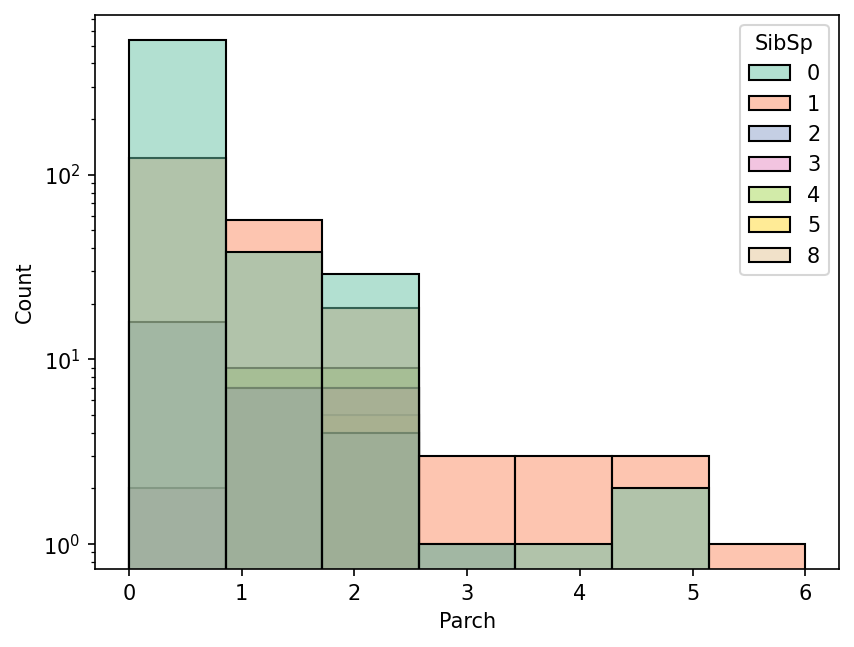

In [753]:
sns.histplot(data=df, x="Parch", hue="SibSp", stat="count", bins=7, palette=sns.color_palette("Set2")[0:7])
plt.yscale("log")
plt.show()  

## Name

In [754]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = TfidfVectorizer()
countvectorizer = CountVectorizer()

In [755]:
last_names = []

tickets = df.Ticket.value_counts().index.to_list()
for ticket in tickets[0:30]:
    fam = df.groupby("Ticket").get_group(ticket)
    print(fam.Name.to_list())
    fam_names_vector = vectorizer.fit_transform(fam.Name.to_list())
    fam_names_count_vector = countvectorizer.fit_transform(fam.Name.to_list())

    df_countvect = pd.DataFrame(data = fam_names_count_vector.toarray(), columns = countvectorizer.get_feature_names_out())
    # print(df_countvect.sum().sort_values(ascending=False).index[0:2].to_list())
    most_repeated_name = df_countvect.sum().sort_values(ascending=False).index[0]
    titles = ["mr", "miss", "master", "mrs"]
    if most_repeated_name in titles:
        most_repeated_name = df_countvect.sum().sort_values(ascending=False).index[1]
    last_names.append(most_repeated_name)

print(last_names)

['Andersson, Mr. Anders Johan', 'Andersson, Miss. Ellis Anna Maria', 'Andersson, Miss. Ingeborg Constanzia', 'Andersson, Miss. Sigrid Elisabeth', 'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)', 'Andersson, Miss. Ebba Iris Alfrida', 'Andersson, Master. Sigvard Harald Elias']
['Sage, Master. Thomas Henry', 'Sage, Miss. Constance Gladys', 'Sage, Mr. Frederick', 'Sage, Mr. George John Jr', 'Sage, Miss. Stella Anna', 'Sage, Mr. Douglas Bullen', 'Sage, Miss. Dorothy Edith "Dolly"']
['Bing, Mr. Lee', 'Ling, Mr. Lee', 'Lang, Mr. Fang', 'Foo, Mr. Choong', 'Lam, Mr. Ali', 'Lam, Mr. Len', 'Chip, Mr. Chang']
['Panula, Master. Juha Niilo', 'Panula, Master. Eino Viljami', 'Panula, Mr. Ernesti Arvid', 'Panula, Mrs. Juha (Maria Emilia Ojala)', 'Panula, Mr. Jaako Arnold', 'Panula, Master. Urho Abraham']
['Goodwin, Master. William Frederick', 'Goodwin, Miss. Lillian Amy', 'Goodwin, Master. Sidney Leonard', 'Goodwin, Master. Harold Victor', 'Goodwin, Mrs. Frederick (Augusta Tyler)', 'Goodwin

## SibSp

# Conclusions for Data Preprocessing and Feature Engineering

The exploratory data analysis performed on this dataset allows us to extract some key takeaways for the next phase. These include the conclusions in following two categories:

## Data Preprocessing

- Replace free Fare row values with median/mean ticket price for each class.

## Feature engineering

- Fare is heavily skewed, for which it needs a log-normal transformation.
    - After said transformation, one could opt for standard or min-max scaling.
- Age has a reasonable distribution, and would only need a standard scaling or a min-max scaling.
- Family size would be the sum of Parch and SibSp
- Sex shall be tranformed to its one-hot encoding version

Random question: remove outliers before or after transformation??? --> need to look this up

In this case, it looks like removing them afterwards might result in a better final distribution? 